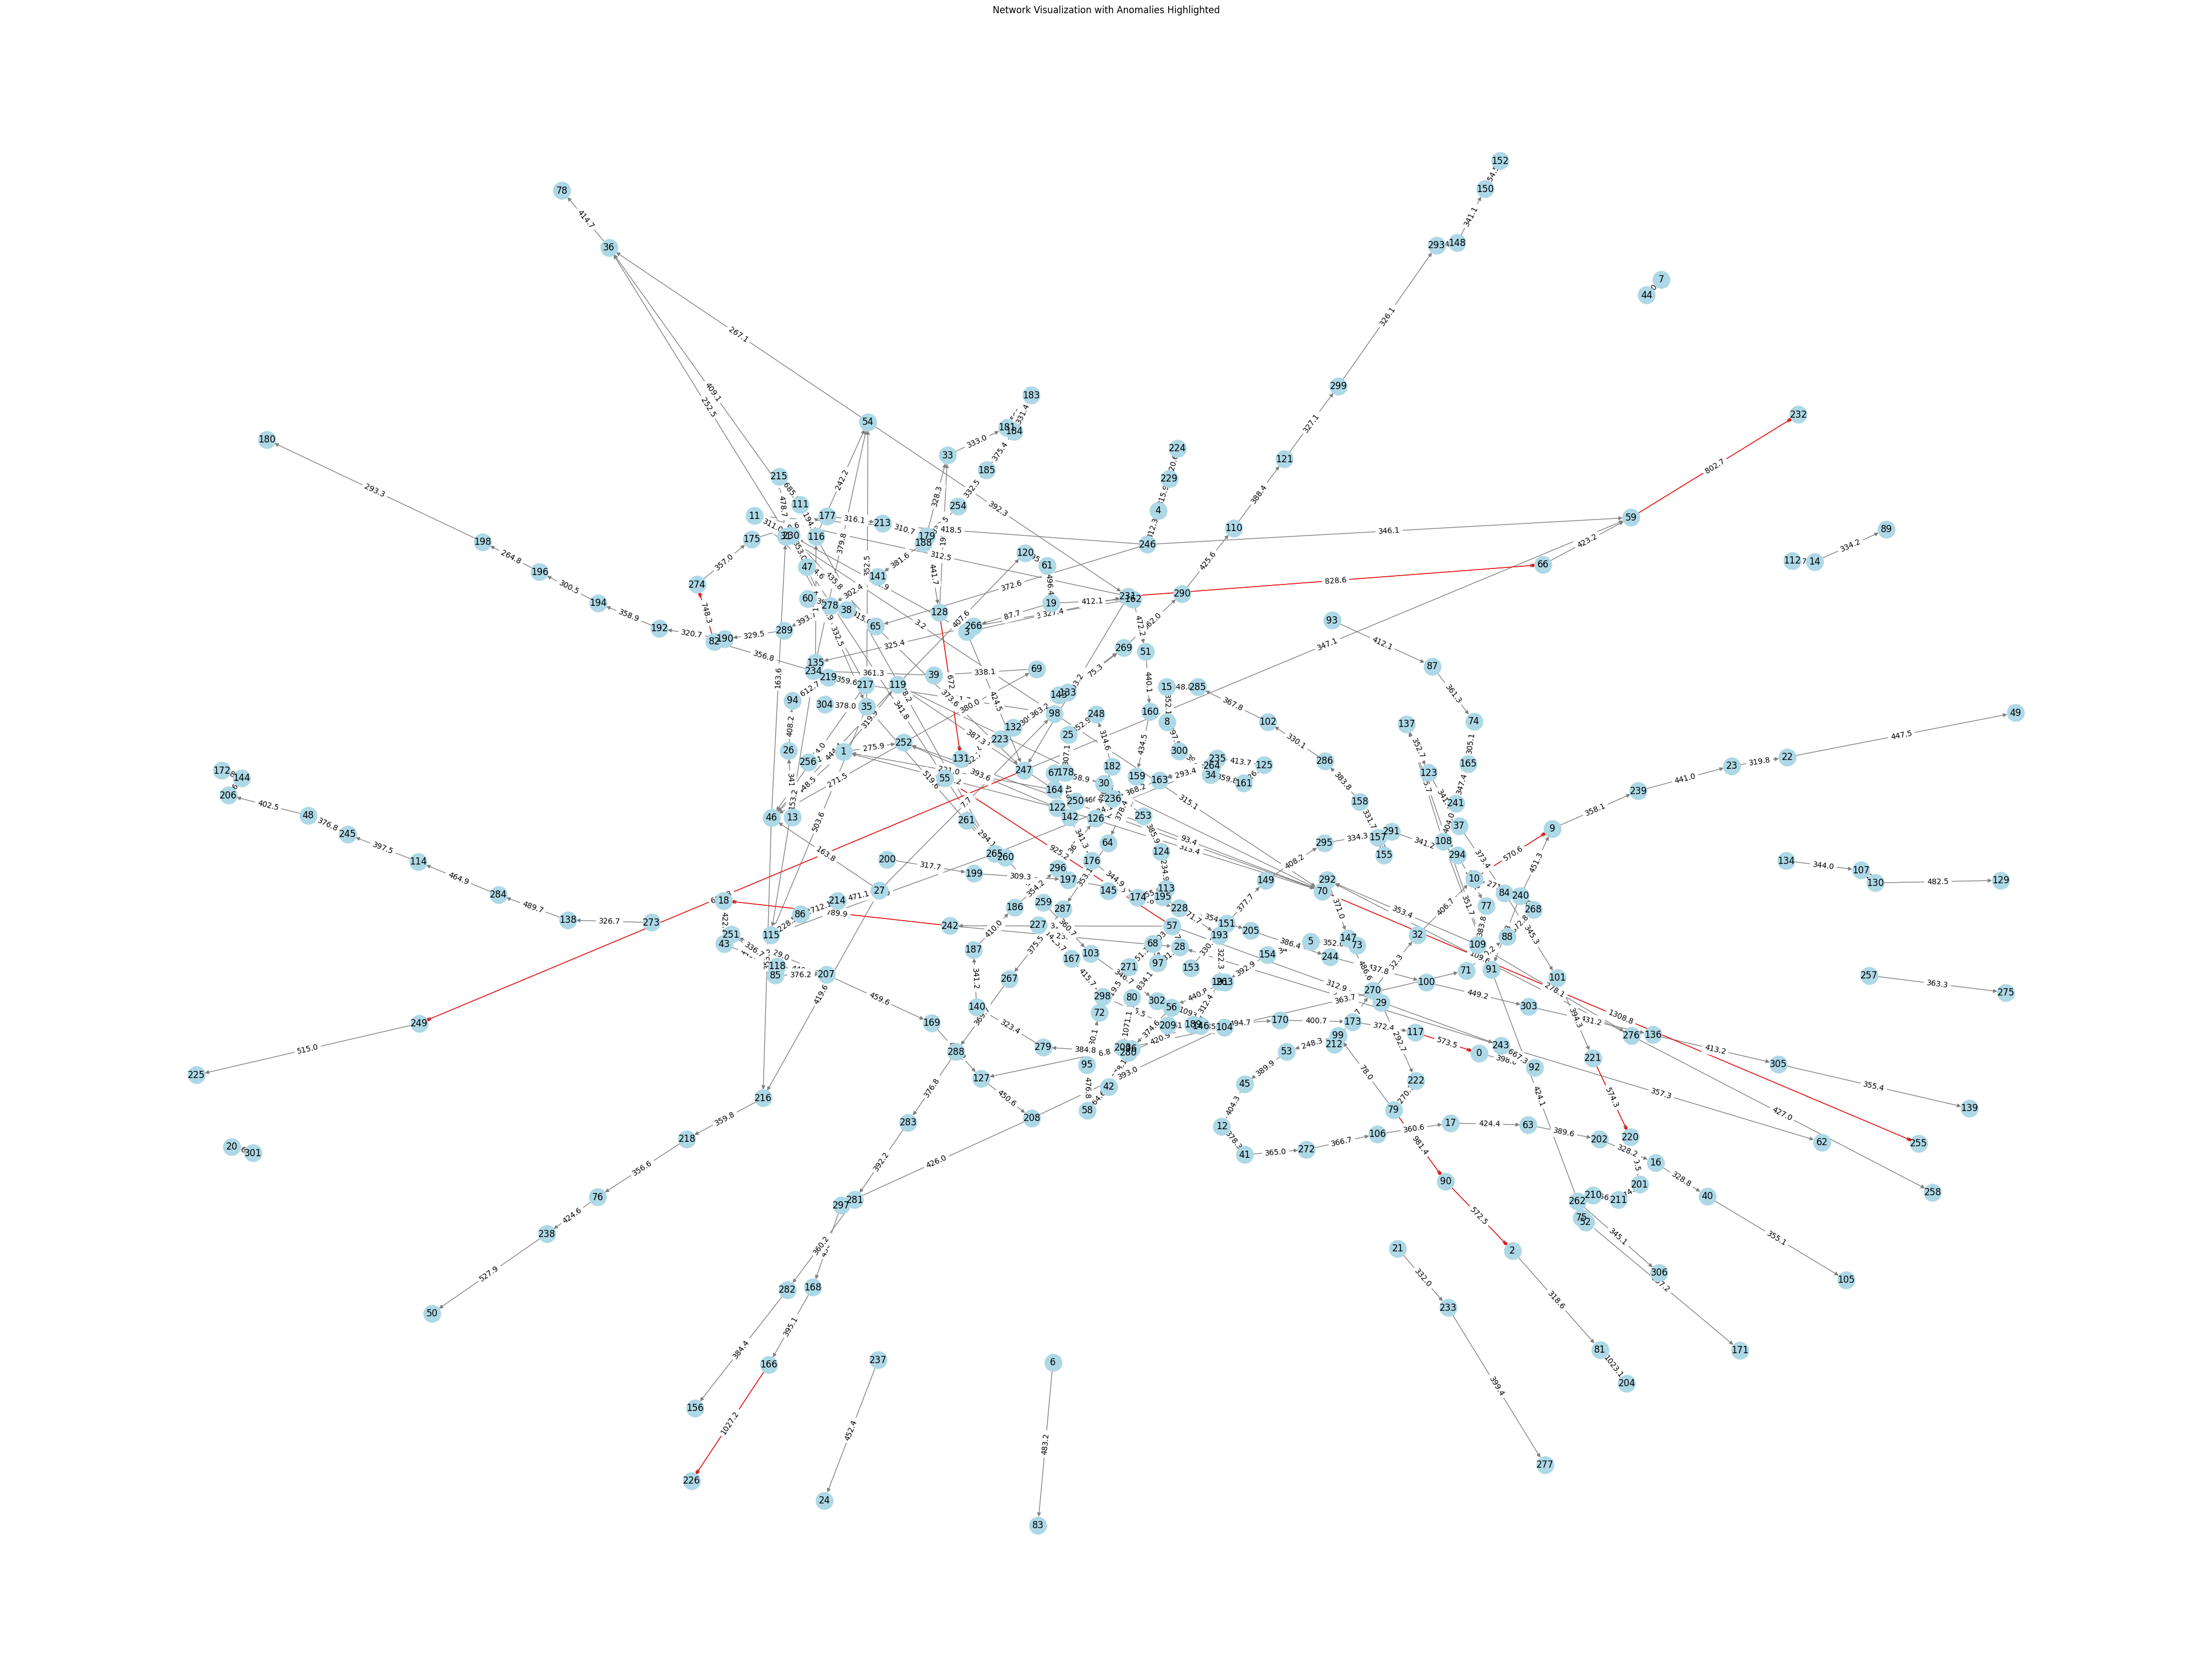

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance

df = pd.read_csv('./data/PEMS04/PEMS04.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

pos = nx.spring_layout(G)

# Define function to calculate estimated distance based on node positions
def estimate_distance(row):
    from_node = row['from']
    to_node = row['to']
    from_pos = pos[from_node]
    to_pos = pos[to_node]
    return distance.euclidean(from_pos, to_pos)

df['estimated_distance'] = df.apply(estimate_distance, axis=1)

# Calculate the highest cost in the dataset
highest_cost = df['cost'].max()

# Define a function to calculate baseline cost for nodes at similar distances
def calculate_baseline_cost(row):
    from_node = row['from']
    to_node = row['to']
    same_distance_edges = df[df['estimated_distance'] == row['estimated_distance']]
    return same_distance_edges['cost'].mean()

df['baseline_cost'] = df.apply(calculate_baseline_cost, axis=1)

# Define threshold for anomaly detection based on highest cost (adjust as needed)
threshold_factor = 0.2  # Adjust this factor as needed to define abnormal cost

# Identify anomalies based on abnormal cost compared to baseline
anomalies = df[df['cost'] > highest_cost * threshold_factor]

# Visualize the network with anomalies highlighted
plt.figure(figsize=(40, 30))

# Draw non-anomaly edges
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)

# Draw anomaly edges
nx.draw_networkx_edges(G, pos, edgelist=anomalies[['from', 'to']].values.tolist(), edge_color='red', arrows=True)

labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Network Visualization with Anomalies Highlighted')
plt.show()
